In [26]:
import json
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [1]:
file = "/home/max/Results/fb_pol-yearly-bert/sentence-bert-swedish-cased/cluster_data.json"

In [3]:
with open(file) as f:
    data = json.loads(f.read())

In [4]:
data.keys()

dict_keys(['A1_globalistisk', 'N1_berikare', 'N1_förortsgäng', 'N1_globalist', 'N1_kulturberikare', 'N1_återvandring', 'N2_återvandrare', 'P1_ordning_och_reda_i_flyktingpolitiken', 'P1_självständig_utrikespolitik', 'V1_berika', 'V1_hjälpa_på_plats', 'V1_kulturberika', 'V1_återvandra', 'V2_hjälpa_X_på_plats'])

In [5]:
data["N1_berikare"].keys()

dict_keys(['kms', 'km5', 'km15', 'acs', 'kmsr50', 'acsr50'])

In [7]:
data["N1_berikare"]["kms"].keys()

dict_keys(['npd', 'jsd', 'years', 'changes', 'mnd', 'chi2', 'dofs', 'p(chi2)', 'cluster_counts', 'words_per_class', 'log', 'vx_log'])

In [8]:
data["N1_berikare"]["kms"]["dofs"]

{'2000_2001': None,
 '2001_2002': None,
 '2002_2003': None,
 '2005_2006': None,
 '2006_2007': 1,
 '2007_2008': 1,
 '2008_2009': 1,
 '2009_2010': 1,
 '2010_2011': 1,
 '2011_2012': 1,
 '2012_2013': 1,
 '2013_2014': 1,
 '2014_2015': 1,
 '2015_2016': 1,
 '2016_2017': 1,
 '2017_2018': 1,
 '2018_2019': 1,
 '2019_2020': 1,
 '2020_2021': 1,
 '2021_2022': 1}

In [30]:
my_ds = []
for term in data:
    for method in data[term]:
        for transition in data[term][method]["dofs"]:
            my_ds.append(data[term][method]["dofs"][transition])

In [31]:
len(my_ds)

1306

In [32]:
for d, c in sorted(Counter(my_ds).items(), key=lambda x: x[-1]):
    print(d, c)

3 36
5 44
14 46
2 79
4 139
1 279
None 683


In [33]:
my_ps = []
for term in data:
    for method in data[term]:
        for transition in data[term][method]["p(chi2)"]:
            my_ps.append(data[term][method]["p(chi2)"][transition])

In [36]:
#Counter(my_ps)

Counter({None: 683,
         0.15061383499177766: 1,
         0.8148431476049776: 1,
         0.5697567437252707: 1,
         0.5456760449151696: 1,
         0.010131742934621329: 1,
         0.2996216421200117: 1,
         0.1606522950984505: 1,
         0.3224707063933589: 1,
         0.0002535402103334144: 1,
         0.03230367067677719: 1,
         0.573458263459995: 1,
         0.7679979119529328: 1,
         0.16991011987115048: 1,
         0.19948791674899763: 1,
         0.34659862581234346: 1,
         0.6971218641025481: 1,
         0.6356590531901848: 1,
         0.47797093959528114: 1,
         0.006440789906079231: 1,
         0.10294390549695731: 1,
         0.21361695976609726: 1,
         0.7380615128075492: 1,
         0.00017144417925324938: 1,
         0.008130848945461193: 1,
         0.770121752479803: 1,
         0.6223294816783754: 1,
         0.16592922606029742: 1,
         0.5217284490502974: 1,
         3.552825821782593e-05: 1,
         0.001931344253850711

In [43]:
nonan = [p for p in my_ps if p != None]

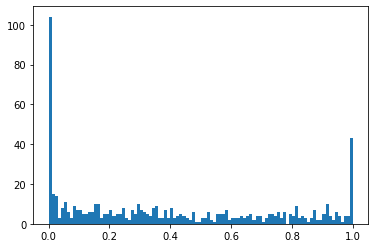

In [44]:
plt.hist(nonan, bins=100)
plt.show()

In [45]:
nonan = [p for p in my_ps if p != None]
len(nonan) / len(my_ps)

0.4770290964777948